# 로이터 뉴스

## 라이브러리 버전 확인

In [268]:
import tensorflow
import matplotlib
import seaborn 
import numpy 
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.9.0
3.5.3
0.12.0
1.22.4
1.5.1
1.1.3


In [269]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 로이터 뉴스 데이타 불러오기

In [270]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=3000, test_split=0.2)

### 데이타 Shape

In [271]:
print(x_train.shape) 
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)


(8982,)
(8982,)
(2246,)
(2246,)


In [272]:
# input data가 text embedding이므로 길이가 모두 다르다
print(len(x_train[0]))
print(len(x_train[1]))

87
56


### 데이타 살펴보기

In [273]:
print(x_train[42])
print(y_train[42])

[1, 599, 1815, 299, 45, 1320, 194, 198, 2041, 28, 932, 294, 517, 1213, 2, 334, 66, 199, 8, 17, 12]
16


In [274]:
print(x_test[42])
print(y_test[42])

[1, 486, 341, 134, 19, 32, 26, 14, 134, 19, 32, 26, 255, 219, 93, 124, 146, 93, 102, 17, 12]
3


### 클래스의 수

In [275]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


### Data Visualization

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


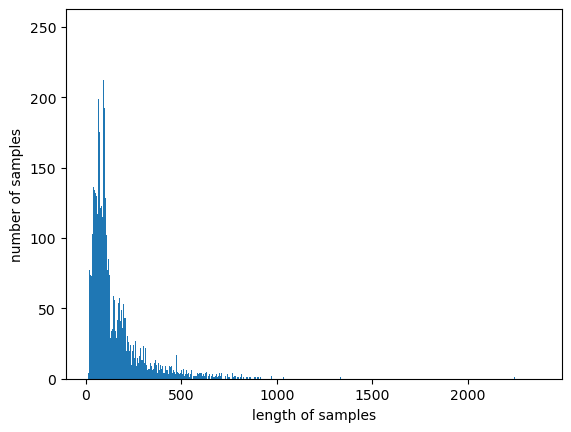

In [276]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=1000)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

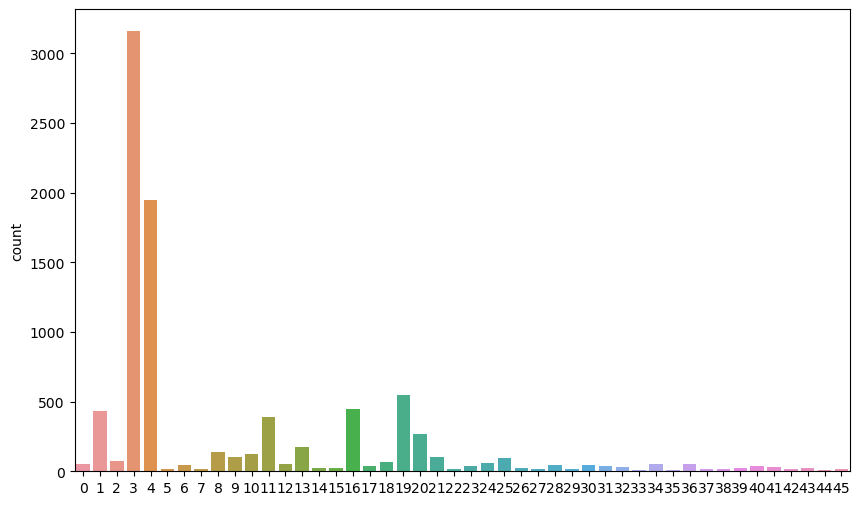

In [277]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(10,6)
sns.countplot(x=y_train)
plt.show()

In [278]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("클래스별 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

클래스별 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


# 텍스트 복원 

In [279]:
word_to_index = reuters.get_word_index(path="reuters_word_index.json")

In [280]:
index_to_word = { index+3 : word for word, index in word_to_index.items() }

In [281]:
# index_to_word : 0 <pad>, 1 <sos>, 2 <unk> 추가
for index, token in enumerate(['<pad>', '<sos>', '<unk>']):
    index_to_word[index]=token

In [282]:
# 복원 시험
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


# vocab size 변경

In [283]:
#모든 단어 사용
(x30_train, y30_train), (x30_test, y30_test) = reuters.load_data(num_words=None, test_split=0.2)

In [284]:
print(x30_train.shape) 
print(y30_train.shape)

print(x30_test.shape)
print(y30_test.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [285]:
def get_vocab_size_of(x_train: np.ndarray, x_test: np.ndarray) -> int:
    X = np.concatenate((x_train, x_test),axis=0)    
    vocab = set()
    for sentence in X:
        vocab.update(set(sentence))
    return len(vocab)

In [286]:
get_vocab_size(x30_train, x30_test)

30980

In [287]:
# vocab : 20,000
(x20_train, y20_train), (x20_test, y20_test) = reuters.load_data(num_words=20000, test_split=0.2)

In [288]:
get_vocab_size(x20_train, x20_test)

19998

In [289]:
# vocab : 10,000
(x10_train, y10_train), (x10_test, y10_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [290]:
get_vocab_size(x10_train, x10_test)

9998

In [291]:
# vocab : 8,000
(x8_train, y8_train), (x8_test, y8_test) = reuters.load_data(num_words=8000, test_split=0.2)

In [292]:
get_vocab_size(x8_train, x8_test)

7998

In [293]:
# decode tokens  
index_word ={ i+3 : w for w, i in reuters.get_word_index().items()}
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_word[index]=token

def decode_text(token) :
    decoded = []
    for i in token :
        decoded.append(index_word[i])
    
    return ' '.join(decoded)

In [294]:
for i, docs in enumerate([x_train,x20_train,x8_train]) :
    vocab_limit = {0:'all', 1:'20000', 2:'8000'}
    
    print('vocab_size:', vocab_limit[i])
    print(decode_text(docs[0]))    
    print()

vocab_size: all
<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3

vocab_size: 20000
<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3

vocab_size: 8000
<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share 

In [295]:
def convert_id2word(tokens) :
    return [decode_text(token) for token in tokens]

In [296]:
x30_train = convert_id2word(x30_train)
x30_test = convert_id2word(x30_test)

x20_train = convert_id2word(x20_train)
x20_test = convert_id2word(x20_test)

x10_train = convert_id2word(x10_train)
x10_test = convert_id2word(x10_test)

x8_train = convert_id2word(x8_train)
x8_test = convert_id2word(x8_test)

# Vectorization

In [297]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [298]:
def tfidf_vectorization(x_train, x_test) :

    # DTM
    dtf = CountVectorizer()
    x_train = dtf.fit_transform(x_train)
    x_test = dtf.transform(x_test)
    
    #TF-IDF
    tfidfvector = TfidfTransformer()
    x_train = tfidfvector.fit_transform(x_train)
    x_test = tfidfvector.transform(x_test)
    
    print('train shape: ', x_train.shape)
    print('test shape: ', x_test.shape)
    print()
    
    return x_train, x_test, tfidfvector

In [299]:
print('vocab size : all')
x30_train_vocab, x30_test_vocab, tfidfvector30 = tfidf_vectorization(x30_train, x30_test)

print('vocab size : 20000')
x20_train_vocab, x20_test_vocab, tfidfvector20 = tfidf_vectorization(x20_train, x20_test)

print('vocab size : 10000')
x10_train_vocab, x10_test_vocab, tfidfvector10 = tfidf_vectorization(x10_train, x10_test)

print('vocab size : 8000 ')
x8_train_vocab, x8_test_vocab, tfidfvector8 = tfidf_vectorization(x8_train, x8_test)

vocab size : all
train shape:  (8982, 26506)
test shape:  (2246, 26506)

vocab size : 20000
train shape:  (8982, 18479)
test shape:  (2246, 18479)

vocab size : 10000
train shape:  (8982, 9670)
test shape:  (2246, 9670)

vocab size : 8000 
train shape:  (8982, 7772)
test shape:  (2246, 7772)



# 모델 훈련

나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

In [300]:
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import f1_score

In [301]:
meta_data = {'x30' : {'x_train' : x30_train_vocab, 'x_test' : x30_test_vocab, 'y_train' : y30_train, 'y_test' : y30_test }, 
             'x20' : {'x_train' : x20_train_vocab, 'x_test' : x20_test_vocab, 'y_train' : y20_train, 'y_test' : y20_test },
             'x10' : {'x_train' : x10_train_vocab, 'x_test' : x10_test_vocab, 'y_train' : y10_train, 'y_test' : y10_test },
             'x8' :  {'x_train' : x8_train_vocab, 'x_test' : x8_test_vocab, 'y_train' : y8_train, 'y_test' : y8_test }} 

In [302]:
def compare_model_results(model, data) :
    vocab_size = ['x30', 'x20', 'x10', 'x8']
    results = []
    for i in vocab_size :
        model = model
        model.fit(meta_data[i]['x_train'], meta_data[i]['y_train'])
        f1score = f1_score( meta_data[i]['y_test'], model.predict(meta_data[i]['x_test']), average='weighted')
        results.append(f1score)
        
    return results

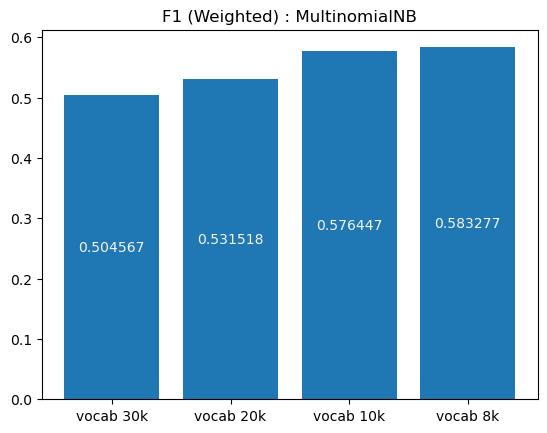

In [317]:
# 1. MultinomialNB

f1 = compare_model_results(MultinomialNB(), meta_data)

fig, ax = plt.subplots()

X_LABELS = ['vocab 30k', 'vocab 20k', 'vocab 10k', 'vocab 8k']
TITLE_F1 = 'F1 (Weighted) : ' 
TEXT_COLOR = 'whitesmoke'
CENTER_LABEL = 'center'

p1 = ax.bar(X_LABELS, f1)
ax.bar_label(p1,label_type=CENTER_LABEL, color=TEXT_COLOR)
plt.title(TITLE_F1 + 'MultinomialNB')
plt.show()

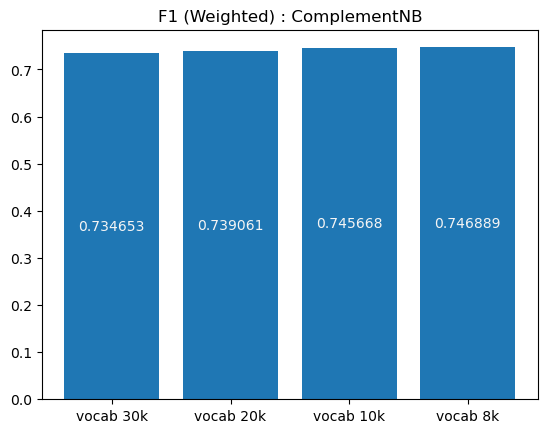

In [318]:
# 2. ComplementNB

f1 = compare_model_results(ComplementNB(), meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(X_LABELS, f1)
ax.bar_label(p1,label_type=CENTER_LABEL, color=TEXT_COLOR)
plt.title(TITLE_F1 + 'ComplementNB')
plt.show()

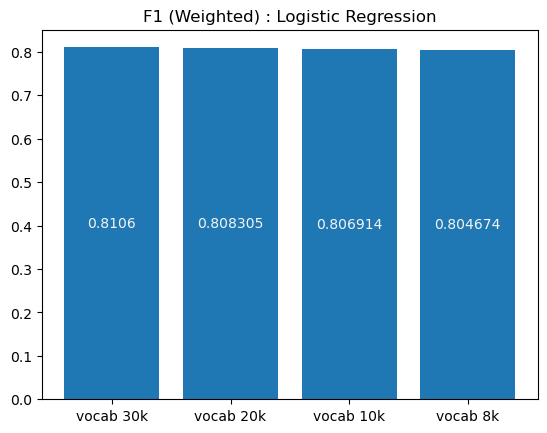

In [319]:
# 3. LogisticRegression
model = LogisticRegression(C=1000, penalty='l2', max_iter=3000)

f1 = compare_model_results(model, meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(X_LABELS, f1)
ax.bar_label(p1,label_type=CENTER_LABEL, color=TEXT_COLOR)
plt.title(TITLE_F1 + 'Logistic Regression')
plt.show()

/Users/ksh/miniforge3/envs/tutorial/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ksh/miniforge3/envs/tutorial/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ksh/miniforge3/envs/tutorial/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ksh/miniforge3/envs/tutorial/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


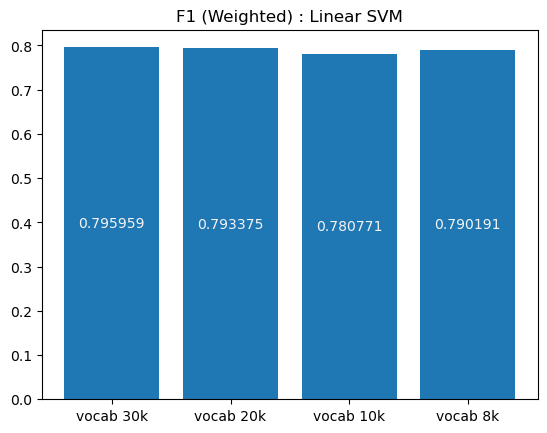

In [320]:
#4 SVM

model = LinearSVC(C=1000)

f1 = compare_model_results(model, meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(X_LABELS, f1)
ax.bar_label(p1,label_type=CENTER_LABEL, color=TEXT_COLOR)
plt.title(TITLE_F1 + 'Linear SVM')
plt.show()

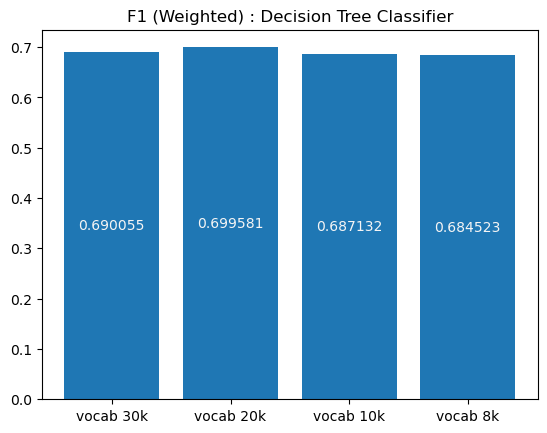

In [321]:
#5 DecisionTreeClassifier

model = DecisionTreeClassifier()

f1 = compare_model_results(model, meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(X_LABELS, f1)
ax.bar_label(p1,label_type=CENTER_LABEL, color=TEXT_COLOR)
plt.title(TITLE_F1 + 'Decision Tree Classifier' )
plt.show()

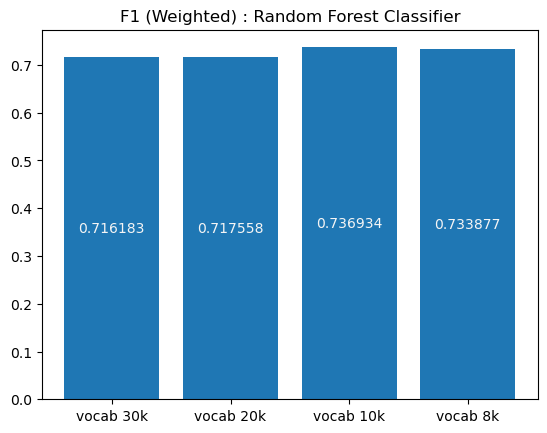

In [322]:
#6 RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

f1 = compare_model_results(model, meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(X_LABELS, f1)
ax.bar_label(p1,label_type=CENTER_LABEL, color=TEXT_COLOR)
plt.title(TITLE_F1 + 'Random Forest Classifier' )
plt.show()

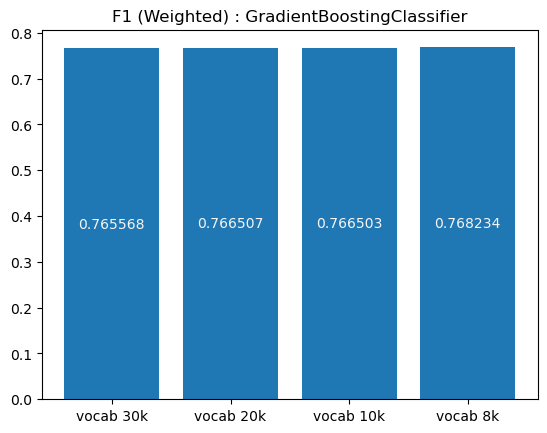

In [323]:
#7 GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)

f1 = compare_model_results(model, meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(X_LABELS, f1)
ax.bar_label(p1, label_type=CENTER_LABEL, color=TEXT_COLOR)
plt.title(TITLE_F1 + 'Gradient Boosting Classifier')
plt.show()

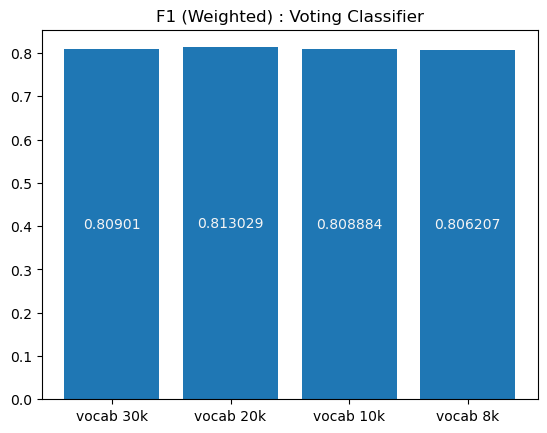

In [324]:
#8 Voting Classifier

model = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=1000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')

f1 = compare_model_results(model, meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(X_LABELS, f1)
ax.bar_label(p1,label_type=CENTER_LABEL, color=TEXT_COLOR)
plt.title(TITLE_F1 + 'Voting Classifier')
plt.show()

### 고찰

1. 다양한 방법의 분류기를 모델로 사용하여 택스트를 분류할 수 있었다.
2. 분류기에 따라 약간의 성능 차이가 있었으나 대부분의 분류기가 비슷한 성능을 보여주었다.
3. Linear SVM, LogisticRegression, Voting Classifier가 비교적 좋은 F1 Score를 나타냈다.
4. vocab size에 따른 F1 score의 향상은 일정하지 않았으며, 큰 차이는 없었다. 
5. vocab size가 20k 이상인 경우에 약간의 F1 Score 향상이 있었다. 
6. vocab size가 증가했어도 F1 Score가 반드시 향상되지는 않는다. 분류기마다 직접 실험을 통해 확인해야 한다.